In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
!pip install plotly

from plotly.offline import init_notebook_mode,iplot,plot
import plotly as py
import plotly.graph_objs as go
init_notebook_mode(connected=True)
from plotly.offline import plot, iplot, init_notebook_mode


# word cloud library
from wordcloud import WordCloud

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id="1"></a> <br>
# Loading data 

In [2]:
timesData = pd.read_csv("timesData.csv")

In [3]:
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [4]:
timesData.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


<a id="2"></a> <br>
# Line Charts
### Line Charts Example: Citation and Teaching vs World Rank of Top 100 Universities


In [5]:

df = timesData.iloc[:100,:]
trace1 = go.Scatter(
    x = df.world_rank,
    y=df.citations,
    mode="lines",
    text = df.university_name,
    name="citations",
    marker = dict(color = "rgba(16,18,25,0.8)")
    
)
trace2 = go.Scatter(
    x = df.world_rank,
    y= df.teaching,
    mode="lines+markers",
    marker = dict(color="rgba(25,14,155,0.8)"),
    text = df.university_name
)
data= [trace1,trace2]
layout = dict(title ="citations and teaching vs world rank of the top 100 universities",
              xaxis = dict(title= "world rank",ticklen=5,zeroline=False ))
fig = dict(data=data,layout=layout)
iplot(fig)



<a id="3"></a> <br>
# Scatter Charts
### Scatter Example: Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years

In [6]:
# Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years
df2014= timesData[timesData.year==2014].iloc[:100,:]
df2015= timesData[timesData.year==2015].iloc[:100,:]
df2016= timesData[timesData.year==2016].iloc[:100,:]

trace1 = go.Scatter(
    x = df2014.world_rank,
    y = df2014.citations,
    mode = "markers",
    name= "2014",
    text=df2014.university_name,
    marker = dict(color = "rgba(155,100,18,0.8)")
)
trace2 = go.Scatter(
    x = df2015.world_rank,
    y = df2015.citations,
    text = df2015.university_name,
    mode = "markers",
    marker = dict(color="rgba(10,80,60,0.8)"),
    name="2015"
)
trace3 = go.Scatter(
    x = df2016.world_rank,
    y = df2016.citations,
    text = df2016.university_name,
    mode = "markers",
    marker = dict(color="rgba(69,180,60,0.8)"),
    name="2016"
)
data = [trace1,trace2,trace3]
layout= dict(title="citation vs world rank of top 100 universities with 2014, 2015 and 2016 years",
             xaxis = dict(title="World Rank",ticklen=5,zeroline=True),
             yaxis = dict(title="Citations",ticklen=5,zeroline=False)
             
            )
fig = dict(data=data,layout=layout)
iplot(fig)

<a id="4"></a> <br>
# Bar Charts
### First Bar Charts Example: citations and teaching of top 3 universities in 2014 (style1)


In [7]:
df2014 = timesData[timesData.year == 2014].iloc[:3,:]
df2014

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1002,1,California Institute of Technology,United States of America,94.4,65.8,98.2,99.8,91.2,94.9,"2,243",6.9,27%,33 : 67,2014
1003,2,Harvard University,United States of America,95.3,66.2,98.5,99.1,40.6,93.9,"20,152",8.9,25%,NaN,2014
1004,2,University of Oxford,United Kingdom,89.0,90.2,98.5,95.4,90.3,93.9,"19,919",11.6,34%,46 : 54,2014


In [8]:
trace1 = go.Bar(
    x = df2014.university_name,
    y = df2014.citations,
    text = df2014.country,
    name = "citations",
    marker = dict(color="rgba(255,174,255,0.5)",
                  line=dict(color ="rgba(0,0,0)",width= 1.5))
    
)
trace2 = go.Bar(
    x = df2014.university_name,
    y = df2014.teaching,
    text = df2014.country,
    name = "teaching",
    marker = dict(color="rgba(255,255,128,0.5)",
                  line=dict(color ="rgba(0,0,0)",width= 1.5))
    
)
data= [trace1,trace2]
layout = dict(barmode = "group")
fig = dict(data =data,layout=layout)
iplot(fig)

### Second Bar Charts Example: citations and teaching of top 3 universities in 2014 (style2)
### Actually, if you change only the barmode from group to relative in previous example, you achieve what we did here. However, for diversity I use different syntaxes.

In [9]:
x=df2014.university_name
trace1={
    "x":x,
    "y":df2014.citations,
    "name":"Citations",
    "type":"bar"
};
trace2={
    "x":x,
    "y":df2014.teaching,
    "name":"teaching",
    "type":"bar"
};
data=[trace1,trace2]
layout={
    "xaxis":{"title":"Top 3 universities"},
    "barmode":"relative",
    "title":"citations and teaching of top 3 universities in 2014"
};
fig = go.Figure(data=data,layout=layout)
iplot(fig)

### Third Bar Charts Example: Horizontal bar charts. (style3) Citation vs income for universities

In [10]:
import plotly.graph_objs as go
from plotly import tools
import matplotlib.pyplot as plt
# prepare data frames
df2016 = timesData[timesData.year == 2016].iloc[:7,:]

y_saving = [each for each in df2016.research]
y_net_worth  = [float(each) for each in df2016.income]
x_saving = [each for each in df2016.university_name]
x_net_worth  = [each for each in df2016.university_name]
trace0 = go.Bar(
                x=y_saving,
                y=x_saving,
                marker=dict(color='rgba(171, 50, 96, 0.6)',line=dict(color='rgba(171, 50, 96, 1.0)',width=1)),
                name='research',
                orientation='h',
)
trace1 = go.Scatter(
                x=y_net_worth,
                y=x_net_worth,
                mode='lines+markers',
                line=dict(color='rgb(63, 72, 204)'),
                name='income',
)
layout = dict(
                title='Citations and income',
                yaxis=dict(showticklabels=True,domain=[0, 0.85]),
                yaxis2=dict(showline=True,showticklabels=False,linecolor='rgba(102, 102, 102, 0.8)',linewidth=2,domain=[0, 0.85]),
                xaxis=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0, 0.42]),
                xaxis2=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0.47, 1],side='top',dtick=25),
                legend=dict(x=0.029,y=1.038,font=dict(size=10) ),
                margin=dict(l=200, r=20,t=70,b=70),
                paper_bgcolor='rgb(248, 248, 255)',
                plot_bgcolor='rgb(248, 248, 255)',
)
annotations = []
y_s = np.round(y_saving, decimals=2)
y_nw = np.rint(y_net_worth)
# Adding labels
for ydn, yd, xd in zip(y_nw, y_s, x_saving):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2', y=xd, x=ydn - 4,text='{:,}'.format(ydn),font=dict(family='Arial', size=12,color='rgb(63, 72, 204)'),showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1', y=xd, x=yd + 3,text=str(yd),font=dict(family='Arial', size=12,color='rgb(171, 50, 96)'),showarrow=False))

layout['annotations'] = annotations

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                          shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout'].update(layout)
iplot(fig)

C:\Users\muesa\anaconda3\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



<a id="5"></a> <br>
# Pie Charts
### Pie Charts Example: Students rate of top 7 universities in 2016

In [11]:
df2016 = timesData[timesData.year==2016].iloc[:7,:]
pie1 = df2016.num_students
pie1_list = [float(i.replace(",",".")) for i in pie1]
labels = df2016.university_name
fig = {
    "data": [{
        "values":pie1_list,
        "labels":labels,
        "domain":{"x" : [0, .5]},
        "name": "Number Of Student Rates",
        "hoverinfo":"label+percent+name",
        "hole": .3,
        "type":"pie"
    }],
    "layout":{
        "title":"Universities Number Of Students Rates",
        "annotations":[
            {"font":{"size":20},
            "showarrow": True,
            "text":"Number Of Students",
            "x": 0.2,
            "y": 1
            }
        ]
    }
}
iplot(fig)

<a id="6"></a> <br>
# Bubble Charts
### Bubble Charts Example: University world rank (first 20) vs teaching score with number of students(size) and international score (color) in 2016

In [12]:
df2016.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,1,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,"2,243",6.9,27%,33 : 67,2016
1804,2,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,"19,919",11.6,34%,46 : 54,2016
1805,3,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,"15,596",7.8,22%,42 : 58,2016
1806,4,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,"18,812",11.8,34%,46 : 54,2016
1807,5,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,"11,074",9.0,33%,37 : 63,2016


In [13]:
df2016 = timesData[timesData.year==2016].iloc[:20,:]
num_students_size = [float(each.replace(",",".")) for each in df2016.num_students]
international_color = [float(each) for each in df2016.international]
data = [
    {
        "x":df2016.world_rank,
        "y":df2016.teaching,
        "text": df2016.university_name,
        "mode":"markers",
        "marker": {
            "color": international_color,
            "size":num_students_size,
            "showscale":True
        }
    }
]
iplot(data)


<a id="7"></a> <br>
# Histogram 
### Lets look at histogram of students-staff ratio in 2011 and 2012 years.

In [14]:
x2011 = timesData.student_staff_ratio[timesData.year==2011]
x2012 = timesData.student_staff_ratio[timesData.year==2012]
trace1 = go.Histogram(
    x=x2011,
    opacity=0.75,
    name="2011",
    marker= dict(color="rgba(171, 50, 96, 0.6)")
)
trace2 = go.Histogram(
    x=x2012,
    opacity=0.75,
    name="2012",
    marker = dict(color="rgba(12, 50, 196, 0.6)")
)
data = [trace1,trace2]
layout = go.Layout(
    barmode="overlay",
    title="Student stuff ratio in 2011 and 2012",
    xaxis=dict(title="student stuff ratio"),
    yaxis=dict(title="count")
)
fig = go.Figure(data=data,layout=layout)
iplot(fig)

<a id="8"></a> <br>
# Word Cloud

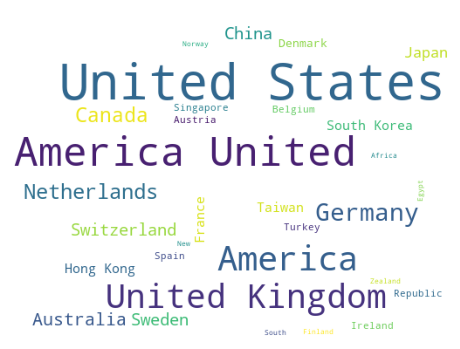

In [15]:
# data prepararion
x2011 = timesData.country[timesData.year == 2011]
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(x2011))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

<a id="9"></a> <br>
# Box Plots

In [16]:
# data preparation
x2015 = timesData[timesData.year == 2015]

trace0 = go.Box(
    y=x2015.total_score,
    name = 'total score of universities in 2015',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    )
)
trace1 = go.Box(
    y=x2015.research,
    name = 'research of universities in 2015',
    marker = dict(
        color = 'rgb(12, 128, 128)',
    )
)
data = [trace0, trace1]
layout = go.Layout(
    title='2015 Yılında Üniversitelerin Toplam Puanı ve Araştırma Değerlendirmesi',
    xaxis=dict(title='Kategoriler'),
    yaxis=dict(title='Skorlar', autorange='reversed'),
    width=800,
    height=500,
    plot_bgcolor='rgb(230, 230, 230)',
)
fig=go.Figure(data=data,layout=layout)
iplot(fig)

<a id="10"></a> <br>
# Scatter Matrix Plot
### Scatter Matrix = it helps us to see covariance and relation between more than 2 features

In [17]:
# import figure factory
import plotly.figure_factory as ff
# prepare data
dataframe = timesData[timesData.year == 2015]
data2015 = dataframe.loc[:,["research","international", "total_score"]]
data2015["index"] = np.arange(1,len(data2015)+1)
# scatter matrix
fig = ff.create_scatterplotmatrix(data2015, diag='box', index="index",colormap='Portland',
                                  colormap_type='cat',
                                  height=700, width=700)
iplot(fig)

<a id="11"></a> <br>
# Inset Plots
### Inset Matrix = 2 plots are in one frame

In [18]:
import pandas as pd
import plotly.graph_objs as go

# Veri setini yükleme


# Birinci çizgi grafiği
trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.teaching,
    name="teaching",
    marker=dict(color="rgba(58,55,55,0.8)")
)

# İkinci çizgi grafiği
trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    name="income",
    marker=dict(color="rgba(17,69,86,0.8)"),
    xaxis="x2",
    yaxis="y2"
)

# Verileri figürde birleştirme
data = [trace1, trace2]

# Çizgi grafiği için düzenleme
layout = go.Layout(
    xaxis2=dict(
        domain=[0.65, 0.95],
        anchor="y2"
    ),
    yaxis2=dict(
        domain=[0.65, 0.95],
        anchor="x2",
        type="log",
        title="Income"
    ),
    title="Income and Teaching vs World Rank of Universities"
)

# Figure oluşturma
fig = go.Figure(data=data, layout=layout)

# Görselleştirme
iplot(fig)


<a id="12"></a> <br>
# 3D Scatter Plot

In [19]:
trace1 = go.Scatter3d(
    x=dataframe.world_rank,
    y=dataframe.research,
    z = dataframe.citations,
    mode="markers",
    marker=dict(
        size=8,
        color="rgba(255,0,0,0.6)"
    )
)
data=[trace1]
layout = go.Layout(
    margin = dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data,layout=layout)
iplot(fig)

<a id="13"></a> <br>
# Multiple Subplots

In [20]:
trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.research,
    name = "research"
)
trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.citations,
    xaxis='x2',
    yaxis='y2',
    name = "citations"
)
trace3 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis='x3',
    yaxis='y3',
    name = "income"
)
trace4 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.total_score,
    xaxis='x4',
    yaxis='y4',
    name = "total_score"
)
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45]
    ),
    yaxis=dict(
        domain=[0, 0.45]
    ),
    xaxis2=dict(
        domain=[0.55, 1]
    ),
    xaxis3=dict(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55, 1]
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    ),
    title = 'Research, citation, income and total score VS World Rank of Universities'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)